# Лабораторная работа 6

## Сети Кохонена

### Вороновк К.М., М8О-407Б-19

Цель работы: исследование свойств слоя Кохонена, карты Кохонена, а также сетей векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей
в задачах кластеризации и классификации.

Вариант 19

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class Kohonen:
    def __init__(self, dim, nodes_count, lr, nodes = None, r = None):
         self.dim = dim
         self.lr = lr
         self.nodes_count = nodes_count
         
         if r is None:
            self.r = int(nodes_count / 2)
         else:
             self.r = r
         self.nodes = (nodes.copy() if nodes is not None else np.random.rand(nodes_count, dim))


    def fit(self, data, epochs):


        self.masr = []
        self.maslr = []
        
        rcpy = self.r
        lrcpy = self.lr

        for e in range(epochs):
            self.masr.append(self.r)
            self.maslr.append(self.lr)

            np.random.shuffle(data)
            for i in range(len(data)):

                min_dist = np.sqrt(np.sum((data[i] - self.nodes[0]) ** 2))
                index_min_node = 0

                for j in range(self.nodes_count):
                        dist = np.sqrt(np.sum((data[i] - self.nodes[j]) ** 2))
                        if (min_dist > dist):
                            min_dist = dist
                            index_min_node = j

                

                for j in range(self.nodes_count):

                    dist = np.sqrt(np.sum((self.nodes[index_min_node] - self.nodes[j]) ** 2))
                    if  dist < self.r:
                        self.nodes[j] += self.lr * np.exp(- dist / (2 * self.r)) * (- self.nodes[j] + data[i])
            
            self.lr = max(0.01, lrcpy * np.exp(-(e + 1) / epochs))
            self.r = rcpy * np.exp(- (e + 1) * np.log(rcpy) / epochs)

        self.masr = np.array(self.masr)
        self.maslr = np.array(self.maslr)


In [ ]:
data = np.array(([[0, 1], [0.1, 1.1], [0.2, 1.2], [2, 4], [2.1, 4.1], [2.2, 4.2], [4, 1], [4.1, 1.1], [4.2, 1.2], [4.3, 1.3]]))
nodes = np.array([[-1, 1], [3, 3], [-2, 2], [3.5, 2], [-2, 2]], dtype = float)

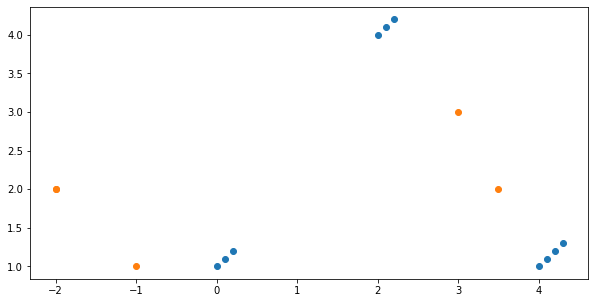

In [ ]:
figure = plt.figure(figsize = (10, 5))

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(nodes[:, 0], nodes[:, 1])

plt.show()

In [ ]:
epochs = 100

In [ ]:
kohonen = Kohonen(dim = 2, nodes_count = 5, lr = 1, nodes = nodes, r = 5)
kohonen.fit(data, epochs)

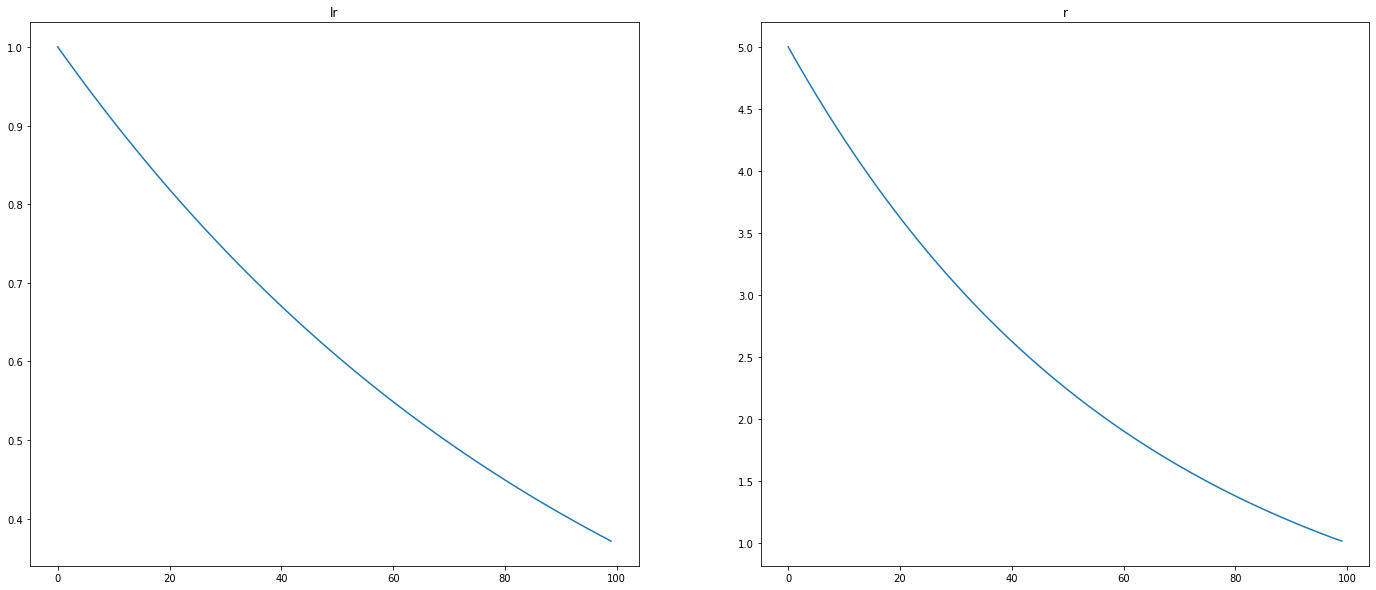

In [ ]:
figure = plt.figure(figsize = (24, 10))

tt = np.arange(0, epochs, 1)

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.set_title('lr')
ax1.plot(tt, kohonen.maslr)

ax2.set_title('r')
ax2.plot(tt, kohonen.masr)

plt.show()

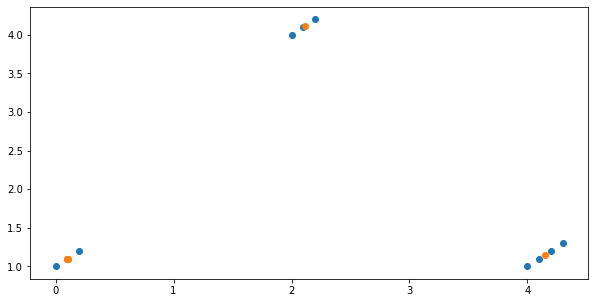

In [ ]:
figure = plt.figure(figsize = (10, 5))

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(kohonen.nodes[:, 0], kohonen.nodes[:, 1])

plt.show()

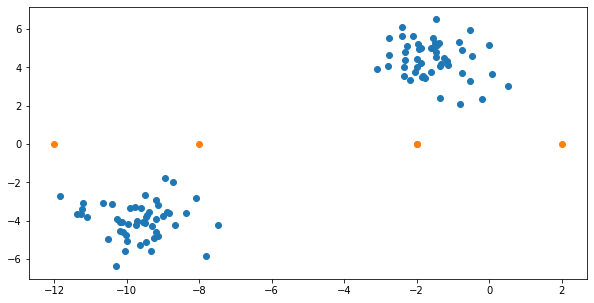

In [ ]:
from sklearn.datasets import make_blobs

data, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 1)


nodes = np.array([[-12, 0], [-8, 0], [-2, 0], [-2, 0], [2, 0]], dtype = float)

figure = plt.figure(figsize = (10, 5))

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(nodes[:, 0], nodes[:, 1])

plt.show()

In [ ]:
kohonen = Kohonen(dim = 2, nodes_count = 5, lr = 1.5, nodes = nodes)
kohonen.fit(data, epochs)

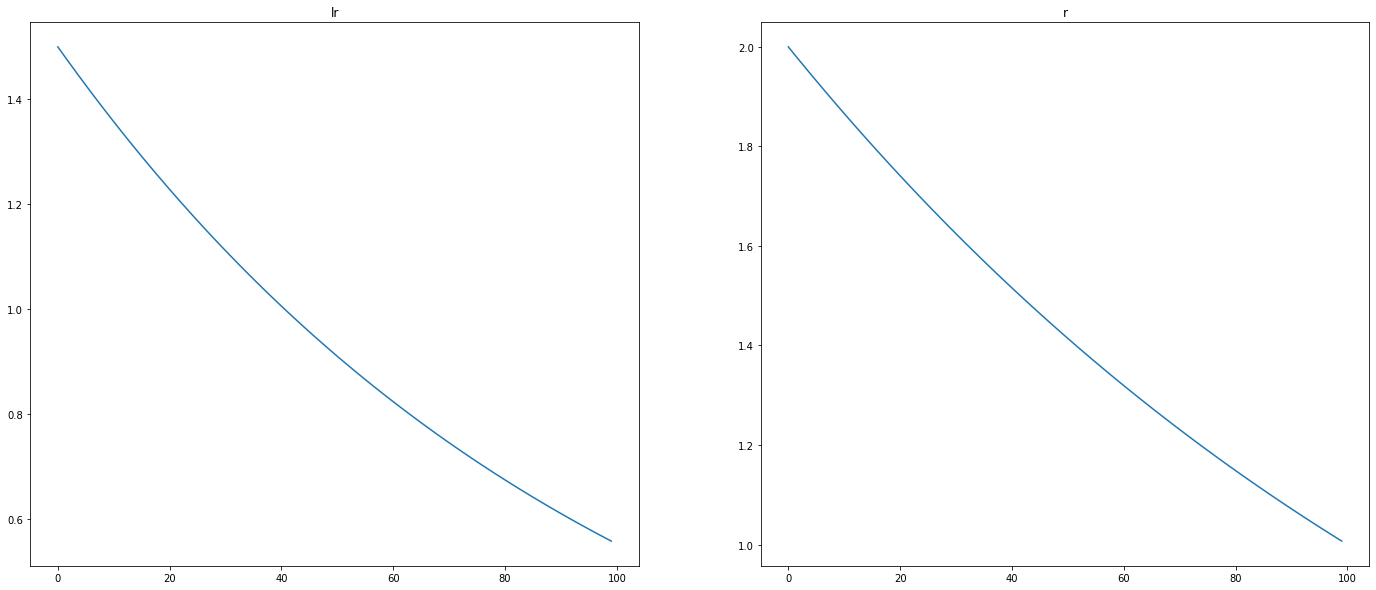

In [ ]:
figure = plt.figure(figsize = (24, 10))

tt = np.arange(0, epochs, 1)

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.set_title('lr')
ax1.plot(tt, kohonen.maslr)

ax2.set_title('r')
ax2.plot(tt, kohonen.masr)

plt.show()

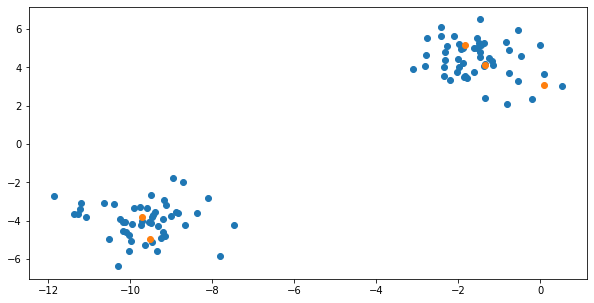

In [ ]:
figure = plt.figure(figsize = (10, 5))

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(kohonen.nodes[:, 0], kohonen.nodes[:, 1])

plt.show()

# Выводы

Выполнив данную лабораторную работу, я изучил строение сетей Кохонена, реализовал их, а также применил в задачах кластеризации и классификации.